In [21]:
!pip install stellargraph

In [22]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split

import stellargraph as sg
import tensorflow as tf

# Dataset Preparation

In [23]:
g1_f = pd.DataFrame(
    {"x": [1, 2, 3, 4], "y": [-0.5, 0.3, 0.15, -0.35]}, index=["a", "b", "c", "d"]
)
g1_f

,x,y
a,1,-0.50
b,2,0.30
c,3,0.15
d,4,-0.35


In [24]:
g1 = pd.DataFrame(
    {"source": ["a", "b", "c", "d", "a"], "target": ["b", "c", "d", "a", "c"]}
)
g1

,source,target
0,a,b
1,b,c
2,c,d
3,d,a
4,a,c


In [25]:
g_final = sg.StellarDiGraph(g1_f, g1)
print(g_final.info())

StellarDiGraph: Directed multigraph
 Nodes: 4, Edges: 5

 Node types:
  default: [4]
    Features: float32 vector, length 2
    Edge types: default-default->default

 Edge types:
    default-default->default: [5]
        Weights: all 1 (default)
        Features: none


In [26]:
g2_f = pd.DataFrame(
    {"x": [10, 20, 30, 40], "y": [-0.25, 0.39, 0.5, -0.5]}, index=["a1", "b1", "c1", "d1"]
)
g2_f

,x,y
a1,10,-0.25
b1,20,0.39
c1,30,0.50
d1,40,-0.50


In [27]:
g2 = pd.DataFrame(
    {"source": ["a1", "b1", "c1", "d1", "a1"], "target": ["b1", "c1", "d1", "a1", "c1"]}
)
g2

,source,target
0,a1,b1
1,b1,c1
2,c1,d1
3,d1,a1
4,a1,c1


In [28]:
g_final2 = sg.StellarDiGraph(g2_f, g2)
print(g_final2.info())

StellarDiGraph: Directed multigraph
 Nodes: 4, Edges: 5

 Node types:
  default: [4]
    Features: float32 vector, length 2
    Edge types: default-default->default

 Edge types:
    default-default->default: [5]
        Weights: all 1 (default)
        Features: none


In [29]:
g3_f = pd.DataFrame(
    {"x": [15, 25, 35, 52], "y": [-0.15, 0.40, 0.52, -0.15]}, index=["a11", "b11", "c11", "d11"]
)
g3_f

,x,y
a11,15,-0.15
b11,25,0.40
c11,35,0.52
d11,52,-0.15


In [30]:
g3 = pd.DataFrame(
    {"source": ["a11", "b11", "c11", "d11", "a11"], "target": ["b11", "c11", "a11", "b11", "d11"]}
)
g3

,source,target
0,a11,b11
1,b11,c11
2,c11,a11
3,d11,b11
4,a11,d11


In [31]:
g_final3 = sg.StellarDiGraph(g3_f, g3)
print(g_final3.info())

StellarDiGraph: Directed multigraph
 Nodes: 4, Edges: 5

 Node types:
  default: [4]
    Features: float32 vector, length 2
    Edge types: default-default->default

 Edge types:
    default-default->default: [5]
        Weights: all 1 (default)
        Features: none


In [32]:
g4_f = pd.DataFrame(
    {"x": [115, 125, 315, 152], "y": [-0.915, 0.840, 0.952, -0.715]}, index=["a111", "b111", "c111", "d111"]
)
g4_f

,x,y
a111,115,-0.915
b111,125,0.840
c111,315,0.952
d111,152,-0.715


In [33]:
g4 = pd.DataFrame(
    {"source": ["a111", "b111", "c111", "d111", "a111"], "target": ["d111", "b111", "d111", "b111", "a111"]}
)
g4

,source,target
0,a111,d111
1,b111,b111
2,c111,d111
3,d111,b111
4,a111,a111


In [34]:
g_final4 = sg.StellarDiGraph(g4_f, g4)
print(g_final4.info())

StellarDiGraph: Directed multigraph
 Nodes: 4, Edges: 5

 Node types:
  default: [4]
    Features: float32 vector, length 2
    Edge types: default-default->default

 Edge types:
    default-default->default: [5]
        Weights: all 1 (default)
        Features: none


In [35]:
#classify graph class

graph_labels = [0,1,0,1]
graph_labels = pd.get_dummies(graph_labels, drop_first=True)


In [36]:
graph_labels

,1
0,0
1,1
2,0
3,1


In [37]:
#List of 4 graphs
graphs = [g_final, g_final2,g_final3,g_final4]

# Modelling


In [38]:
from stellargraph.mapper import PaddedGraphGenerator
from stellargraph.layer import GCNSupervisedGraphClassification
from stellargraph import StellarGraph

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow import keras

from sklearn import model_selection

from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

from stellargraph.layer import DeepGraphCNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten

In [39]:
print(graphs[0].info())

StellarDiGraph: Directed multigraph
 Nodes: 4, Edges: 5

 Node types:
  default: [4]
    Features: float32 vector, length 2
    Edge types: default-default->default

 Edge types:
    default-default->default: [5]
        Weights: all 1 (default)
        Features: none


In [40]:
#Prepare graph generator
#To feed data to the tf.Keras model that will be created later, we need a data generator. 

generator = PaddedGraphGenerator(graphs = graphs)

In [41]:
#First create the base DGCNN model that includes the graph convolutional and SortPooling layers.

k = 35  # the number of rows for the output tensor
layer_sizes = [32, 32, 32, 1]

dgcnn_model = DeepGraphCNN(
    layer_sizes=layer_sizes,
    activations=["tanh", "tanh", "tanh", "tanh"],
    k=k,
    bias=False,
    generator=generator,
)
x_inp, x_out = dgcnn_model.in_out_tensors()

Instructions for updating:
Use fn_output_signature instead


In [42]:
#Next, add the convolutional, max pooling, and dense layers.

x_out = Conv1D(filters=16, kernel_size=sum(layer_sizes), strides=sum(layer_sizes))(x_out)
x_out = MaxPool1D(pool_size=2)(x_out)

x_out = Conv1D(filters=32, kernel_size=5, strides=1)(x_out)

x_out = Flatten()(x_out)

x_out = Dense(units=128, activation="relu")(x_out)
x_out = Dropout(rate=0.5)(x_out)

predictions = Dense(units=1, activation="sigmoid")(x_out)

In [43]:
#Finally, create the Keras model and prepare it for training by specifying the loss and optimisation algorithm.

model = Model(inputs=x_inp, outputs=predictions)

model.compile(
    optimizer=Adam(lr=0.0001), loss=binary_crossentropy, metrics=["acc"],
)

# Train the model
We can now train the model using the model’s fit method.

In [44]:
train_graphs, test_graphs = model_selection.train_test_split(
    graph_labels, train_size=0.5, test_size=0.5, stratify=graph_labels,
)

In [45]:
#Create a StellarGraph.PaddedGenerator generator object that prepares the data for training.
#Create data generators suitable for training at tf.keras model by calling the latter generator’s flow method specifying the train and test data.

gen = PaddedGraphGenerator(graphs=graphs)

train_gen = gen.flow(
    list(train_graphs.index -1),
    targets=train_graphs.values,
    batch_size=10,
    symmetric_normalization=False,
)

test_gen = gen.flow(
    list(test_graphs.index -1),
    targets=test_graphs.values,
    batch_size=1,
    symmetric_normalization=False,
)

In [46]:
epochs = 20

In [47]:
history = model.fit(
    train_gen, epochs=epochs, verbose=1, validation_data=test_gen, shuffle=True,
)

Epoch 1/20


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1/1 [==============================] - 0s 447ms/step - loss: 0.6764 - acc: 0.5000 - val_loss: 0.6953 - val_acc: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 39ms/step - loss: 0.6866 - acc: 0.5000 - val_loss: 0.6954 - val_acc: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 39ms/step - loss: 0.6787 - acc: 0.5000 - val_loss: 0.6955 - val_acc: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 36ms/step - loss: 0.6923 - acc: 0.5000 - val_loss: 0.6956 - val_acc: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 40ms/step - loss: 0.6664 - acc: 0.5000 - val_loss: 0.6957 - val_acc: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 37ms/step - loss: 0.6946 - acc: 0.5000 - val_loss: 0.6958 - val_acc: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 40ms/step - loss: 0.6847 - acc: 0.5000 - val_loss: 0.6959 - val_acc: 0.5000
Epoch 8/20
1/1 [==============================] - 0s 41ms/step - loss: 0.7042 - acc: 0.5000 - val_loss: 0.6

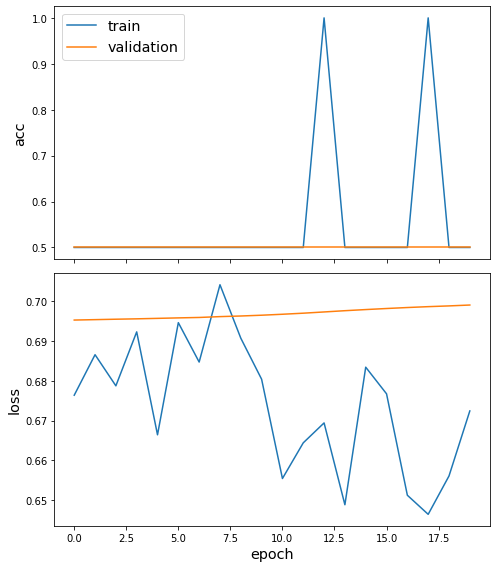

In [48]:
sg.utils.plot_history(history)

In [49]:
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

2/2 [==============================] - 0s 2ms/step - loss: 0.6991 - acc: 0.5000

Test Set Metrics:
	loss: 0.6991
	acc: 0.5000
